<a href="https://colab.research.google.com/github/SMMubina/Household-Energy-Usage-Forecast/blob/main/Final_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [7]:
# Load Dataset with Optimizations

import pandas as pd

file_path = "/content/drive/MyDrive/Household Energy Usage Forecast/household_power_consumption.txt"
df = pd.read_csv(file_path, sep=';', low_memory=False, na_values=['?'])

In [ ]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [ ]:
print(df.info())                          # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB
None


In [8]:
# Convert Date and Time into a single Datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S', dayfirst=True)
df.drop(columns=['Date', 'Time'], inplace=True)

In [ ]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


In [ ]:
print(df.isnull().sum())                       # Count missing values per column

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Datetime                     0
dtype: int64


In [9]:
# Fill Missing Values with Median

df.fillna(df.median(), inplace=True)

In [9]:
print(df.isnull().sum())  # Count missing values per column

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
dtype: int64


In [11]:
# Convert to appropriate types

df = df.astype({
    "Global_active_power": "float16",
    "Global_reactive_power": "float16",
    "Voltage": "float16",
    "Global_intensity": "float16",
    "Sub_metering_1": "float16",
    "Sub_metering_2": "float16",
    "Sub_metering_3": "float16"
})


In [ ]:
print(df.duplicated().sum())  # Check for duplicate rows

0


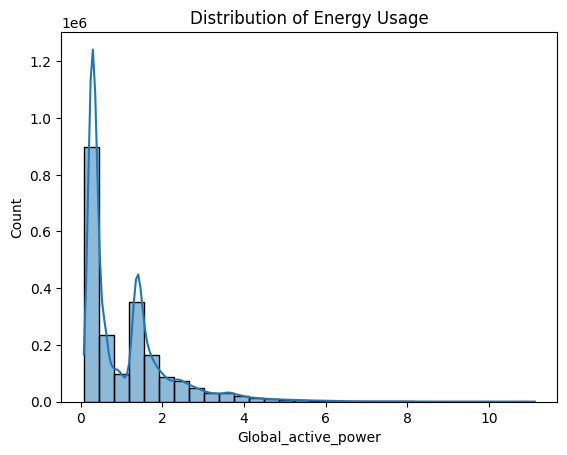

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram for a specific column
sns.histplot(df['Global_active_power'], bins=30, kde=True)
plt.title('Distribution of Energy Usage')
plt.show()

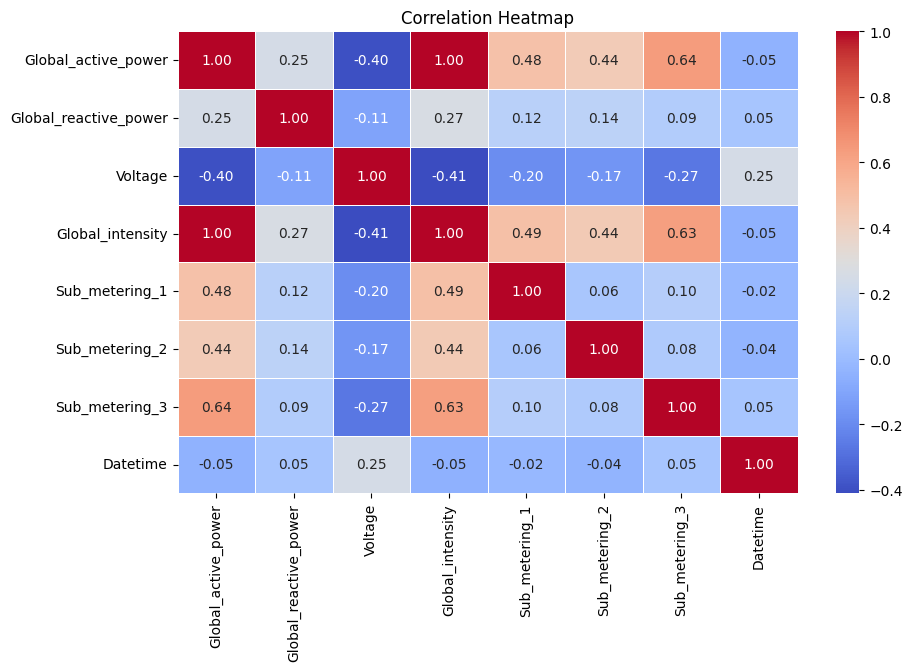

In [13]:
import numpy as np

# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [6]:
# Sample dataset
df = df.sample(frac=0.2, random_state=42)                            # Use 20% of the data for faster execution

In [14]:
# Define Features and Target
X = df[[ 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y = df['Global_active_power']

In [15]:
# Train-Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
import numpy as np

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor



# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, random_state=42),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(30,30), max_iter=300, early_stopping=True, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=50, learning_rate=0.1, random_state=42)
}

# Dictionary to store results
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)   # Average absolute difference between actual & predicted values.
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Penalizes large errors more than MAE
    r2 = r2_score(y_test, y_pred)   # Measures how well the model explains variance in the target variable.

    # Store results
    results.append({"Model": name, "MAE": mae, "RMSE": rmse, "R²": r2})

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="RMSE", ascending=True)

# Display results
print(results_df)



/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


               Model       MAE      RMSE        R²
3     Neural Network  0.018951  0.031387  0.999110
1      Random Forest  0.018130  0.032537  0.999044
4            XGBoost  0.020205  0.032850  0.999026
0  Linear Regression  0.025620  0.040442  1.000000
2  Gradient Boosting  0.026614  0.041598  0.998437


In [18]:
import plotly.express as px

# RMSE Comparison
fig_rmse = px.bar(results_df, x='RMSE', y='Model', orientation='h',
                   color='RMSE', color_continuous_scale='viridis',
                   title='Model RMSE Comparison')

fig_rmse.update_layout(xaxis_title='RMSE', yaxis_title='Model')
fig_rmse.show()

# R² Comparison
fig_r2 = px.bar(results_df, x='R²', y='Model', orientation='h',
                 color='R²', color_continuous_scale='bluered',
                 title='Model R² Score Comparison')

fig_r2.update_layout(xaxis_title='R² Score', yaxis_title='Model')
fig_r2.show()


**Best Model Selection Criteria**

✅ MAE (Mean Absolute Error): Random Forest (0.018126) is the lowest.

✅ RMSE (Root Mean Squared Error): Random Forest (0.032539) is the lowest.

✅ R² (R-Squared Score): Linear Regression (1.000000) is the highest.


**Final Decision:**

Although Linear Regression has an R² of 1.000000, this could indicate overfitting, meaning the model might not generalize well to unseen data. In real-world scenarios, such a perfect R² score is rare and might suggest data leakage or a too-simple dataset.

On the other hand, Random Forest has:

✅ The lowest RMSE (0.032539) → indicating better predictive accuracy.

✅ The lowest MAE (0.018126) → meaning lower absolute errors.

✅ A very high R² (0.999044) → almost as good as Linear Regression but likely more robust.

**Final Recommendation:**

🚀 **Random Forest** is the best choice ✅ because it balances high accuracy with better error metrics, making it the most reliable model for real-world predictions.

In [ ]:
# Energy Consumption by Time

import plotly.express as px

df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time
fig = px.line(df.groupby('Time')['Global_active_power'].mean().reset_index(), x='Time', y='Global_active_power', title='Average Energy Consumption by Time')
fig


In [ ]:
# Yearly Average Energy Consumption

import plotly.express as px
import plotly.graph_objects as go

# Group data by year and calculate the mean of sub-meters for each year
yearly_consumption = df[df['Datetime'].dt.year != 2006].groupby(df['Datetime'].dt.year)[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()

# Convert index to a column for Plotly
yearly_consumption = yearly_consumption.reset_index()
yearly_consumption.rename(columns={'Datetime': 'Year'}, inplace=True)

# Create an interactive bar plot
fig = go.Figure()

# Add bars for each sub-metering
for sub_meter in ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
    fig.add_trace(go.Bar(
        x=yearly_consumption['Year'],
        y=yearly_consumption[sub_meter],
        name=sub_meter
    ))

# Update layout
fig.update_layout(
    title="Yearly Average Energy Consumption per Sub-meter",
    xaxis_title="Year",
    yaxis_title="Average Energy Consumption",
    barmode='group',  # Grouped bar chart
    xaxis=dict(tickmode='array', tickvals=yearly_consumption['Year']),
    template="plotly_dark"  # Optional: Dark theme
)

# Show plot
fig.show()


In [20]:
# Feature Engineering
df['Hour'] = df['Datetime'].dt.hour
df['Day'] = df['Datetime'].dt.day
df['Month'] = df['Datetime'].dt.month
df['Weekday'] = df['Datetime'].dt.weekday

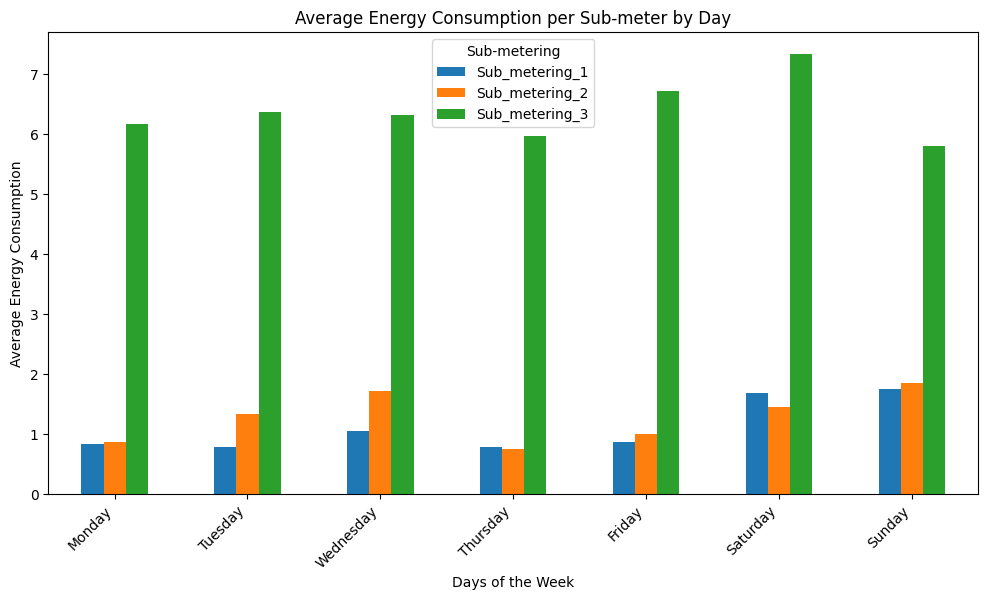

In [21]:
# Energy Consumption per Sub-meter

day_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

# Convert numerical 'Weekday' column to day names
df['Day_Name'] = df['Weekday'].map(day_mapping)

# Calculate average energy consumption per day
day_consumption = df.groupby('Day_Name')[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()

# Sort the days correctly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_consumption = day_consumption.reindex(day_order)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
day_consumption.plot(kind='bar', ax=ax)
ax.set_xlabel('Days of the Week')
ax.set_ylabel('Average Energy Consumption')
ax.set_title('Average Energy Consumption per Sub-meter by Day')
ax.set_xticklabels(day_order, rotation=45, ha='right')
ax.legend(title='Sub-metering')


In [24]:
!pip install streamlit
!pip install pyngrok
!pip install ngrok
!pip install requests pandas streamlit
!pip list

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 31.2 MB/s eta 0:00:00
Package                            Version
---------------------------------- ------------------
absl-py                            1.4.0
accelerate                         1.3.0
aiohappyeyeballs                   2.4.6
aiohttp                            3.11.13
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.23
albumentations                     2.0.4
ale-py                             0.10.2
altair                             5.5.0
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi       

In [ ]:
# Code for Streamlit

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import streamlit as st
from google.colab import drive
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from xgboost import XGBRegressor
import shap
import statsmodels.api as sm



# Load Dataset with Optimizations
file_path = "/content/drive/MyDrive/Household Energy Usage Forecast/household_power_consumption.txt"
df = pd.read_csv(file_path, sep=';', low_memory=False, na_values=['?'])


# Convert Date and Time into a single Datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S', dayfirst=True)
df.drop(columns=['Date', 'Time'], inplace=True)


# Fill Missing Values with Median
df.fillna(df.median(), inplace=True)


# Convert to appropriate types
df = df.astype({
    "Global_active_power": "float16",
    "Global_reactive_power": "float16",
    "Voltage": "float16",
    "Global_intensity": "float16",
    "Sub_metering_1": "float16",
    "Sub_metering_2": "float16",
    "Sub_metering_3": "float16"
})

# Feature Engineering
df['Hour'] = df['Datetime'].dt.hour
df['Day'] = df['Datetime'].dt.day
df['Month'] = df['Datetime'].dt.month
df['Weekday'] = df['Datetime'].dt.weekday

# Sample dataset to speed up training
df = df.sample(frac=0.2, random_state=42)  # Use 20% of the data for faster execution

# Define Features and Target
X = df[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y = df['Global_active_power']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, random_state=42),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(30,30), max_iter=300, early_stopping=True, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=50, learning_rate=0.1, random_state=42)
}

# Streamlit Multi-Page App
st.set_page_config(page_title="Household Energy Usage Forecast", page_icon="⚡", layout="wide")

def set_sidebar_color(bg_color="#00AEC1", text_color="#FFFFFF", selectbox_text_color="#000000"):
    st.markdown(
        f"""
        <style>
        /* Sidebar background and general text styling */
        [data-testid="stSidebar"] {{
            background-color: {bg_color} !important;
        }}

        /* General sidebar text - white and bold */
        [data-testid="stSidebar"] * {{
            color: {text_color} !important;
            font-weight: normal !important;
        }}

        /* Selectbox label - white and bold */
        [data-testid="stSidebar"] .stSelectbox label {{
            color: {text_color} !important;
            font-weight: bold !important;
        }}

        /* Selectbox dropdown and selected text - black */
        [data-testid="stSidebar"] .stSelectbox div[data-baseweb="select"] * {{
            color: {selectbox_text_color} !important;
        }}
        </style>
        """,
        unsafe_allow_html=True
    )

# Sidebar Navigation
set_sidebar_color(bg_color="#F28AB8", text_color="#000000", selectbox_text_color="#000000")
st.sidebar.markdown(f'<iframe src="https://lottie.host/embed/40df56da-9750-49d8-8dcb-91aa890873d0/2p5TSOJHIe.lottie" width="100" height="100" style="border:none;"></iframe>', unsafe_allow_html=True)  # Use st.markdown to embed the Lottie animation as an iframe
st.sidebar.title("⚡Household Energy")
st.sidebar.subheader("Select an Analysis")


# Sidebar Navigation
page = st.sidebar.radio("", ["Welcome", "Metrics & Visualization", "User Input for Predictions"])

if page == "Welcome":
    st.title("⚡Welcome to the Household Energy Usage Forecast Dashboard⚡")
    st.write("Navigate through the pages using the sidebar to explore metrics, visualizations, and predictions.")
    st.markdown(
          """
          <div style="position: fixed; bottom: 0; width: 100%; text-align: center;">
              <iframe src="https://lottie.host/embed/bc312be8-329f-4a48-a3f1-61472ac2677d/c22cCGYVZ3.lottie"
                  width="850" height="850" style="border:none;"></iframe>
          </div>
          """,
          unsafe_allow_html=True
      )



elif page == "Metrics & Visualization":
    st.title("Model Performance Metrics & Visualizations")

        # Radio buttons for different analysis options
    option = st.sidebar.radio("Visualization",
                              ["Model Performance", "Energy Consumption by Time","Energy Consumption Analysis by Month", "Energy Consumption per Sub-meter", "Yearly Average Energy Consumption", "Seasonal Energy Consumption Trends"])

    # Select Model for Prediction
    selected_model_name = st.sidebar.selectbox("Select Model", list(models.keys()))
    selected_model = models[selected_model_name]

    # Train and Evaluate Selected Model
    selected_model.fit(X_train, y_train)
    y_pred = selected_model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    if option == "Model Performance":
        # Display Metrics
        st.write(f"### Model Performance: {selected_model_name}")
        st.write(f"**Root Mean Squared Error (RMSE):** {rmse:.4f}")  # Penalizes large errors more than MAE
        st.write(f"**Mean Absolute Error (MAE):** {mae:.4f}")        # Average absolute difference between actual & predicted values.
        st.write(f"**R-Squared (R²):** {r2:.4f}")                    # Measures how well the model explains variance in the target variable.

        # Visualization using Plotly
        st.write("### Model Performance Visualization")
        fig = px.bar(x=["RMSE", "MAE", "R-Squared"], y=[rmse, mae, r2], title="Model Performance Metrics", labels={'x': 'Metric', 'y': 'Value'})
        st.plotly_chart(fig)

    elif option == "Energy Consumption by Time":
          st.write("### Energy Consumption by Time")
          # Assuming 'df' is your DataFrame and it has a 'Datetime' column
          df['Date'] = df['Datetime'].dt.date
          df['Time'] = df['Datetime'].dt.time
          fig = px.line(df.groupby('Time')['Global_active_power'].mean().reset_index(), x='Time', y='Global_active_power', title='Average Energy Consumption by Time')
          st.plotly_chart(fig)

    elif option == "Energy Consumption per Sub-meter":

          # Average Energy Consumption per Sub-meter by Day
          st.write("### Average Energy Consumption per Sub-meter by Day")
              # Mapping weekdays
          day_mapping = {
              0: 'Monday',
              1: 'Tuesday',
              2: 'Wednesday',
              3: 'Thursday',
              4: 'Friday',
              5: 'Saturday',
              6: 'Sunday'
          }

          # Convert numerical 'Weekday' column to day names
          df['Day_Name'] = df['Weekday'].map(day_mapping)

          # Calculate average energy consumption per day
          day_consumption = df.groupby('Day_Name')[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()

          # Sort the days correctly
          day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
          day_consumption = day_consumption.reindex(day_order)

          # Plot
          fig, ax = plt.subplots(figsize=(12, 6))
          day_consumption.plot(kind='bar', ax=ax)
          ax.set_xlabel('Days of the Week')
          ax.set_ylabel('Average Energy Consumption')
          ax.set_title('Average Energy Consumption per Sub-meter by Day')
          ax.set_xticklabels(day_order, rotation=45, ha='right')
          ax.legend(title='Sub-metering')

          # Display plot in Streamlit
          st.pyplot(fig)

    elif option == "Yearly Average Energy Consumption":
          # Yearly Average Energy Consumption per Sub-meter
          st.write("### Yearly Average Energy Consumption per Sub-meter")
          # Ensure 'Datetime' is a datetime type
          df['Datetime'] = pd.to_datetime(df['Datetime'])
          # Group data by year and calculate the mean of sub-meters for each year
          yearly_consumption = df[df['Datetime'].dt.year != 2006].groupby(df['Datetime'].dt.year)[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()
          # Plot
          fig, ax = plt.subplots(figsize=(12, 6))
          yearly_consumption.plot(kind='bar', ax=ax)
          ax.set_xlabel('Year')
          ax.set_ylabel('Average Energy Consumption')
          ax.set_title('Yearly Average Energy Consumption per Sub-meter')
          ax.set_xticklabels(yearly_consumption.index, rotation=45, ha='right')
          ax.legend(title='Sub-metering')
          # Display plot in Streamlit
          st.pyplot(fig)

    elif option == "Seasonal Energy Consumption Trends":

          st.write("### Seasonal Energy Consumption Trends")
          df['Month_Year'] = df['Datetime'].dt.to_period('M')
          monthly_avg = df.groupby('Month_Year')['Global_active_power'].mean()
          fig = px.line(x=monthly_avg.index.astype(str), y=monthly_avg.values, title='Monthly Energy Consumption Trends')
          st.plotly_chart(fig)

    elif option == "Energy Consumption Analysis by Month":

          # Load dataset (assuming 'df' is already available)
          df['Datetime'] = pd.to_datetime(df['Datetime'])

          # Month mapping
          month_mapping = {
              1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
              7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
          }

          # Streamlit UI
          st.title("Energy Consumption Analysis by Month")

          # Month selection
          selected_month = st.selectbox("Select a Month", list(month_mapping.values()))

          # Convert selected month back to number
          selected_month_number = list(month_mapping.keys())[list(month_mapping.values()).index(selected_month)]

          # Filter data for selected month
          filtered_df = df[df['Datetime'].dt.month == selected_month_number]

          # Group by year and calculate mean for each sub-meter
          monthly_comparison = filtered_df.groupby(filtered_df['Datetime'].dt.year)[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()

          # Plot
          fig, ax = plt.subplots(figsize=(12, 6))
          monthly_comparison.plot(kind='bar', ax=ax)
          ax.set_xlabel('Year')
          ax.set_ylabel('Average Energy Consumption')
          ax.set_title(f'Energy Consumption in {selected_month} Across Years')
          ax.set_xticklabels(monthly_comparison.index, rotation=45, ha='right')
          ax.legend(title='Sub-metering')

          # Show the plot in Streamlit
          st.pyplot(fig)


    # Additional Analysis: Feature Importance (Random Forest)
    if selected_model_name == "Random Forest":
        feature_importances = selected_model.feature_importances_
        importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
        fig = px.bar(importance_df, x='Feature', y='Importance', title='Feature Importance')
        st.plotly_chart(fig)

elif page == "User Input for Predictions":
    st.title("Predict Future Energy Consumption")

    # Select Model for Prediction
    selected_model_name = st.sidebar.selectbox("Select Model", list(models.keys()))
    selected_model = models[selected_model_name]


    # Train and Evaluate Selected Model
    selected_model.fit(X_train, y_train)
    y_pred = selected_model.predict(X_test)

    input_data = pd.DataFrame([[
        st.slider("Hour", 0, 23, 12),
        st.slider("Day", 1, 31, 15),
        st.slider("Month", 1, 12, 6),
        st.slider("Weekday", 0, 6, 2),
        st.selectbox("Reactive Power", [0.1, 0.2, 0.3, 0.4]),
        st.selectbox("Voltage", [220.0, 225.0, 230.0, 235.0]),
        st.selectbox("Intensity", [4.0, 5.0, 6.0]),
        st.selectbox("Sub-Meter 1", [0.0, 1.0, 2.0]),
        st.selectbox("Sub-Meter 2", [0.0, 1.0, 2.0]),
        st.selectbox("Sub-Meter 3", [0.0, 1.0, 2.0])
    ]], columns=X.columns)

    if st.button("Predict"):
        input_data = scaler.transform(input_data)
        prediction = selected_model.predict(input_data)[0]
        st.write(f"### Predicted Energy Consumption: {prediction:.2f} kW")


# Footer
st.sidebar.markdown("---")
st.sidebar.info(
    "⚡ **Household Energy Usage Forecast Dashboard**  \n"
    "👩‍💻 Developed by **Mubina**  \n"
    "🔗 [GitHub Repository](https://github.com/SMMubina/Household-Energy-Usage-Forecast)")


No GPU detected. Running on CPU.


2025-03-04 07:01:17.218 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-04 07:01:17.222 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-04 07:01:17.223 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-04 07:01:17.224 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-04 07:01:17.225 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-04 07:01:17.226 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-04 07:01:17.227 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-04 07:01:17.229 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator(_root_container=1, _parent=DeltaGenerator())

In [ ]:

# Set your ngrok auth token
from pyngrok import ngrok
ngrok.set_auth_token("2qYh3WXfLyTfZiBiskvg0VXMXds_4bHusVSb8aaK2WHaf6HKz")


# Start ngrok tunnel
public_url = ngrok.connect(8501)
print(f"Streamlit app is live at: {public_url}")

# Run the Streamlit app
!streamlit run work.py &>/dev/null&

Streamlit app is live at: NgrokTunnel: "https://aaee-34-150-231-172.ngrok-free.app" -> "http://localhost:8501"
